# Pandas Basics

In [1]:
# !pip install jupterlab
# !pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv(
    r'C:\Users\Admin\PycharmProjects\Practice\Modules\pandas\Freecodecamp\FreeCodeCamp-Pandas-Real-Life-Example-master\data\sales_data.csv',   # file path specified
    parse_dates=['Date'])    # Parse Dates from "Date" column default date_parser YY

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [10]:
df = sales
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [13]:
# To get the location of specified column name
df.columns.get_loc("Day")  
df.index.get_loc(4)  # can be used if the row is indexed by some other number
df.columns.get_loc("Country")


7

In [5]:
def buff_up(x):
    return x*2
# df.loc[:, "buff_up_Gender"] = df.loc[:, "Customer_Gender"].apply(buff_up, axis=1)
# df.loc[:, "buff_up_Cost"] = \
df = df.assign(buff_up=lambda x: buff_up(x.Cost))

In [29]:
temp = list(df.columns)

In [30]:
temp = ['Date',
        'Customer_Age',
        'Customer_Gender',
        'Country',
        'Product_Category',
        'Order_Quantity',
        'Unit_Cost',
        'Unit_Price',
        'Profit',
        'Cost',
        'Revenue']


In [31]:
temp_df=df[temp].head(10)

In [32]:
temp_df

,Date,Customer_Age,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,19,M,Canada,Accessories,8,45,120,590,360,950
1,2015-11-26,19,M,Canada,Accessories,8,45,120,590,360,950
2,2014-03-23,49,M,Australia,Accessories,23,45,120,1366,1035,2401
3,2016-03-23,49,M,Australia,Accessories,20,45,120,1188,900,2088
4,2014-05-15,47,F,Australia,Accessories,4,45,120,238,180,418


In [33]:
# df.assigh
temp_df = temp_df.assign(new_column_name=             # Assign to save changes and name the column as buff_up
               lambda x:            # Use lamba with X
               buff_up(x.Cost))     # use any expression pass df.column_name as the parameter
temp_df

,Date,Customer_Age,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,new_column_name
0,2013-11-26,19,M,Canada,Accessories,8,45,120,590,360,950,720
1,2015-11-26,19,M,Canada,Accessories,8,45,120,590,360,950,720
2,2014-03-23,49,M,Australia,Accessories,23,45,120,1366,1035,2401,2070
3,2016-03-23,49,M,Australia,Accessories,20,45,120,1188,900,2088,1800
4,2014-05-15,47,F,Australia,Accessories,4,45,120,238,180,418,360


In [34]:
df.head(1)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950


In [35]:
df_groupby_month = df.groupby(["Month", "Day"]).mean()

In [36]:
df_groupby_month

,,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Month,Day,,,,,,,,
March,23,2015.0,49.0,21.5,45.0,120.0,1277.0,967.5,2244.5
May,15,2014.0,47.0,4.0,45.0,120.0,238.0,180.0,418.0
November,26,2014.0,19.0,8.0,45.0,120.0,590.0,360.0,950.0


In [37]:
df_pivot = df.pivot(index="Month", columns="Day")

ValueError: Index contains duplicate entries, cannot reshape

In [38]:
import seaborn as sns

<AxesSubplot:xlabel='Month', ylabel='Profit'>

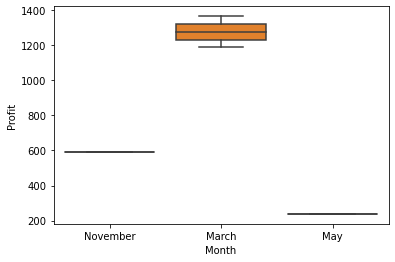

In [40]:
sns.boxplot(x="Month", y="Profit", data=df)

In [ ]:
To fill Nan values with some value use

In [41]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [11]:
# Anki: To get separate aggregate function in df groups use
gb = df.groupby(["Year", "Month"])
gb["Customer_Age"].agg(["median", "mean"])

median       mean
Year Month                      
2011 April       31.0  32.420290
     August      31.0  33.697509
     December    34.0  34.863636
     February    32.0  33.362573
     January     34.0  34.590426
...               ...        ...
2016 January     37.0  37.652019
     July        36.0  36.733914
     June        35.0  36.555490
     March       35.0  36.413193
     May         35.0  36.661815

[62 rows x 2 columns]

In [ ]:
## Anki: To fill Nan values with some value use

In [4]:
from numpy import nan
test1 = pd.DataFrame([[1,2,3,4],["a",nan,"c","d"],[1.1, 2.2, 3.3, nan]])

In [5]:
test1

,0,1,2,3
0,1,2.0,3,4
1,a,NaN,c,d
2,1.1,2.2,3.3,NaN


In [6]:
test1.fillna("")   # Replaces nan values with anything in parans

,0,1,2,3
0,1,2.0,3,4
1,a,VALUE,c,d
2,1.1,2.2,3.3,VALUE


In [ ]:
# Anki: To get separate aggregate function in df groups use
gb = df.groupby(["Year", "Month"])
gb["Customer_Age"].agg(["median", "mean"])